# 다중 계층 퍼셉트론 (MLP)
### MLP 네트워크에 대한 일반적인 학습 알고리즘은  '역전파 알고리즘' 을 사용한다.
##### 시스템의 결과값과 기대값을 비교한다. 계산된 차이 ( 즉, 에러)에 기초에 이 알고리즘은 신경망의 시냅스에 해당하는 가중치를 수정

Extracting ../mnist/train-images-idx3-ubyte.gz
Extracting ../mnist/train-labels-idx1-ubyte.gz
Extracting ../mnist/t10k-images-idx3-ubyte.gz
Extracting ../mnist/t10k-labels-idx1-ubyte.gz
Epoch 0001 cost= 2.116159168
Epoch 0002 cost= 0.597048687
Epoch 0003 cost= 0.398541482
Epoch 0004 cost= 0.292631849
Epoch 0005 cost= 0.223589640
Epoch 0006 cost= 0.173506536
Epoch 0007 cost= 0.136102995
Epoch 0008 cost= 0.106170934
Epoch 0009 cost= 0.084325237
Epoch 0010 cost= 0.066066858
Epoch 0011 cost= 0.052297312
Epoch 0012 cost= 0.040624121
Epoch 0013 cost= 0.031596599
Epoch 0014 cost= 0.024813710
Epoch 0015 cost= 0.019010525
Epoch 0016 cost= 0.014793412
Epoch 0017 cost= 0.011264293
Epoch 0018 cost= 0.008618943
Epoch 0019 cost= 0.006610691
Epoch 0020 cost= 0.005329992
Traning phase finished


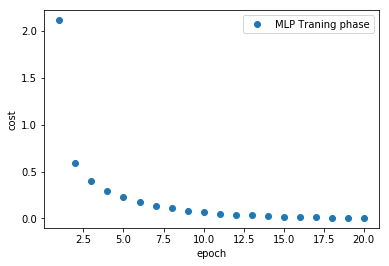

Model Accuracy: 0.9437


In [1]:
import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("../mnist", one_hot=True)

## 신경망에 대한 학습률 
learning_rate = 0.001

## 반복 횟수
training_epochs = 20

## 배치 한번에 분류할 이미지 수
batch_size = 100
display_step = 1

## 첫번째 계층의 뉴런 수
n_hidden_1 = 256

## 두번째 계층의 뉴런 수
n_hidden_2 = 256


## 입력값의 크기
n_input = 784  ## 28*28

## 출력 클래스의 크기
n_classes = 10

## 입력 및출력의 크기를 완벽히 정의했고, 은닉 계층의 개수와 각 계층에서의 뉴런 개수를 정하는 방법에 대한 엄격한 기준은 없다.


### 모델생성

# 입력 텐서
x = tf.placeholder("float",[None,n_input])

## 출력 텐서
y = tf.placeholder("float",[None,n_classes])

# 각 계층의 노드 수
h = tf.Variable(tf.random_normal([n_input, n_hidden_1]))

# 계층 1에대한 편향
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1]))

## 레이어 1은 내적곱 + 편향 에 대한 결과를 전달
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h),bias_layer_1))

## 결과값을 활성화 함수를 통해 다음 계층의 뉴런으로 전달한다
## 은닉계층에 속한 뉴런의 활성화 함수는 선형이 될수 없다!?
## 두번째 중간 계층 256 * 256 
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))

## 두번째 계층의 편향 텐서
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2]))

## 두번째 계층의 뉴런은 계층1의 뉴런으로부터 입력값을 전달 받고 가중치 연결과 결합 후 계층2편향치를 더한다
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w),bias_layer_2))

## 결과 값은 다음 계층인 출력 계층으로 전달된다.
output = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
bias_output = tf.Variable(tf.random_normal([n_classes]))
output_layer = tf.matmul(layer_2, output) + bias_output

## 출력계층은 두번째 계층으로 부터 256 개의 입력 신호를 받게 되는데 이 값은 각 숫자에 대한 클래스에 속할 확률로 변환된다
## 로지스틱 회귀를 위해 비용함수를 정의 한다.
## tf.nn.softmax_cross_entropy_with_logits 함수는 소프트 맥스 계층에 대한 비용을 계산 - 로짓은 모델의 출력값으로 정규화 되지않은 로그 확률
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output_layer,y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer,labels=y))

## 비용함수를 최소화할 옵티마이저는 다음과 같다
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

##세션 실행

## 그래프에 사용할 설정을 정의
avg_set = []
epoch_set =[]

#변수 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    ## 학습 반복 횟수
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        ## 배치에 대해  total_batch 만큼 반복
        for i in range(total_batch):
            ## batch_size 만큼 학습 데이터를 가져옴 ( 100개 )
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            ## 학습수행 옵티마이저와 100개 학습 데이터를 인자로 
            sess.run(optimizer, feed_dict={x: batch_xs, y:batch_ys})
            ## 학습된 내용에 대한 비용 값을 토탈로 나눠서 평균 코스트 계산 
            avg_cost += sess.run(cost,feed_dict={x:batch_xs, y:batch_ys})/total_batch
            
        if(epoch % display_step) == 0:
            print("Epoch",'%04d' % (epoch +1),"cost=","{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Traning phase finished")
    
    ## 에폭 셋, 평균셋에 대한 시각화
    plt.plot(epoch_set, avg_set,'o',label='MLP Traning phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show();
    
    ## 모델평가 arg_max를 씀 ( 가장 높은값의 index를 반환 ) 
    ## output_layer의 classes는 10개이고 10개에 대한 확률에 대해 가장 높은값을 리턴하고 
    correct_prediction = tf.equal(tf.argmax(output_layer,1),tf.argmax(y,1))
    
    ## 정확도 평가
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    print("Model Accuracy:", accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))




